## Notes

Wards placed vs player kills correlation? (With wins only)
Wards placed vs player deaths correlation? (With wins only)

## Todo

Consider getting data visualization lession started for scatter plots

## Importing packages

I manually converted the .csv file to a sqlite 3 file already

In [7]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

import sqlite3
import pandas as pd

con = sqlite3.connect("league_data.sqlite3")
data_file = "league_data.sqlite3"

## Basic Setup

Most of this is just basic setup for config purposes

Dataset source: https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min

40 columns and, 9.8k rows of data to be used

In [8]:
!sqlite3 league_data.sqlite3 ".tables"


match_data


The only table should be match_data

In [9]:
query = """ SELECT * FROM match_data; """

dataframe = pd.read_sql_query(query, con)
con.close()
dataframe

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


## What are the columns and what do they mean?

There are 40 columns in the data set, here is what each of them means

images will be included later

Placables will be marked in RED
<br>Entities will be marked in BLUE
<br>Structures will be marked in YELLOW


<span style="color: red">Wards:</span> Player deployables that allow the placer and allies to view what is happening around the ward until the ward is destroyed
<br><span style="color: blue">Elite Monsters:</span> Includes heralds and dragons. Can be used to push a lane a couple times a round
<br><span style="color: blue">Minions:</span> basic NPCs that periodically spawn on each team that will follow a track and automatically attack enemy players, NPCs, and towers 
<br><span style="color: yellow">Towers:</span> (Also referred to as turrets) Part of the default map, they attack enemy NPCs and players. Damaging and eventually destroying towers grants players and allies gold.

<br>**gameId:** match id. Won't really be important for analysis of data
<br><br>**blueWins:** Boolean value, if 1, then blue won, otherwise red won
<br><br>**blueWardsPlaced:** Int, Number of <span style="color: red">Warding totems</span> placed by the blue team.
<br><br>**blueWardsDestroyed:** Int, Number of red <span style="color: red">Warding totems</span> destroyed by the blue team
<br><br>**blueFirstBlood:** Boolean value, if blue had the first kill of the game, then it is 1
<br><br>**blueKills:** Int, Number of kills by the blue team
<br><br>**blueDeaths:** Int, Number of times blue team players died
<br><br>**blueAssists:** Int, Blue team members assisting other blue team members for a kill
<br><br>**blueEliteMonsters:** Int, Number of <span style="color: blue">elite Monsters</span> killed by blue team. (Includes <span style="color: blue">Dragons</span> and <span style="color: blue">Heralds</span>)
<br><br>**blueDragons:** Int, number of dragons killed by the blue team
<br><br>**blueHeralds:** Int, number of <span style="color: blue">Heralds</span> killed by the blue team
<br><br>**blueTowers:** Int, Number of <span style="color: yellow">towers</span> destroyed by the blue team
<br><br>**blueTotalGold:** Int, total gold of the blue team
<br><br>**blueAvgLevel:** Float, Blue team average champion level (player), goes from 1-18
<br><br>**blueTotalExperience:** Int, Total experience by the blue team
<br><br>**blueTotalMinionsKilled:** Int, number of <span style="color: blue">Minions</span> killed by the blue team
<br><br>**blueTotalJungleMinionsKilled:** Int, Number of <span style="color: blue">jungle monsters</span> killed by the blue team
<br><br>**blueTeamGoldDiff:** Int, Difference between gold of the blue and red team
<br><br>**blueExperienceDiff:** Int, Difference between experience of blue and red team
<br><br>**blueCSPerMin:** Int, Blue team <span style="color: blue">minions</span> per minute
<br><br>**blueGoldPerMin:** Int, Blue team Gold per minute

# Red Table Stat variants

Identical in description to their blue counterparts if they exist

**redWardsPlaced**
<br>**redWardsDestroyed**
<br>**redFirstBlood**
<br>**redKills**
<br>**redDeaths**
<br>**redAssists**
<br>**redEliteMonsters**
<br>**redDragons**
<br>**redHeralds**
<br>**redTowersDestroyed**
<br>**redTotalGold**
<br>**redAvgLevel**
<br>**redTotalExperience**
<br>**redTotalMinionsKilled**
<br>**redTotalJungleMinionsKilled**
<br>**redGoldDiff**
<br>**redExperienceDiff**
<br>**redCSPerMin**
<br>**redGoldPerMin**

<br>

In [10]:
query = """ SELECT 
            CAST(blueWardsPlaced AS INT) AS "Blue Wards Placed",
            CAST(blueKills AS INT) AS "Blue Kills"
            FROM match_data
            WHERE blueWins = 1
            ORDER BY blueWardsPlaced DESC;
"""
con = sqlite3.connect(data_file)
table_info = pd.read_sql_query(query, con)
table_info

,Blue Wards Placed,Blue Kills
0,99,6
1,95,6
2,95,7
3,94,9
4,93,17
...,...,...
4925,10,7
4926,10,8
4927,10,16
4928,10,10


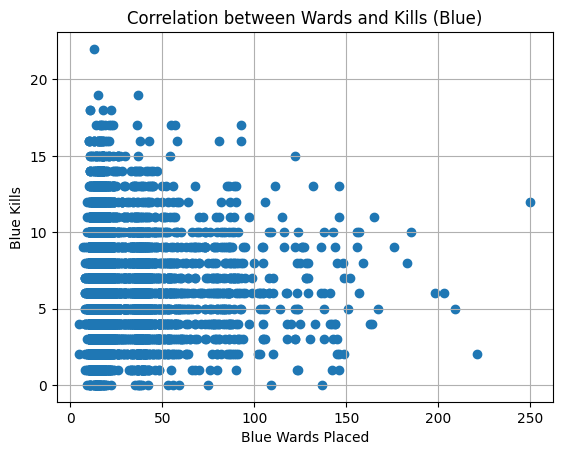

In [22]:
dataGiven = pd.read_csv("high_diamond_ranked_10min.csv")
plt.scatter("blueWardsPlaced", "blueKills", data = dataGiven)
plt.xlabel("Blue Wards Placed")
plt.ylabel("Blue Kills")
plt.title("Correlation between Wards and Kills (Blue)")
plt.grid()
plt.show()

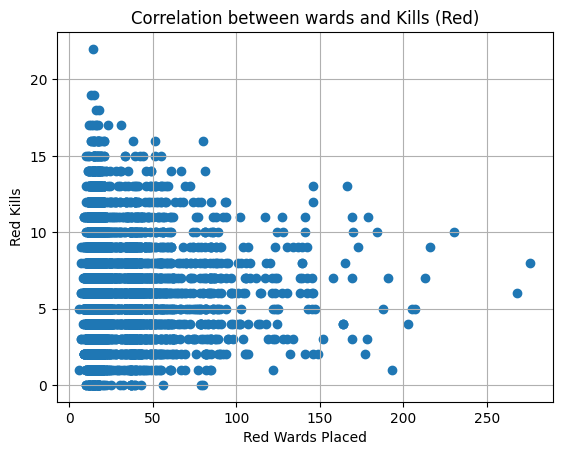

In [25]:
plt.scatter("redWardsPlaced", "redKills", data = dataGiven)
plt.xlabel("Red Wards Placed")
plt.ylabel("Red Kills")
plt.title("Correlation between wards and Kills (Red)")
plt.grid()
plt.show()

## Analysis I

The data from the table shows that there isn't that much correlation between the kills and the wards placed

In [56]:
query = """ PRAGMA table_info(match_data) ;"""
con = sqlite3.connect(data_file)
table_info = pd.read_sql_query(query, con, index_col = "cid")
con.close()
table_info

,name,type,notnull,dflt_value,pk
cid,,,,,
0,gameId,TEXT,0,None,0
1,blueWins,TEXT,0,None,0
2,blueWardsPlaced,TEXT,0,None,0
3,blueWardsDestroyed,TEXT,0,None,0
4,blueFirstBlood,TEXT,0,None,0
5,blueKills,TEXT,0,None,0
6,blueDeaths,TEXT,0,None,0
7,blueAssists,TEXT,0,None,0
8,blueEliteMonsters,TEXT,0,None,0


In [18]:
query = """ SELECT 


"""